This video by 3blue1brown is a very helpful visualizer: https://www.youtube.com/watch?v=spUNpyF58BY&t=607s

Basically, what I'm seeing in the video is that it takes the frequency of a sine or cosine plot, plot's it on the cartesian plane based on different wavelengths. Then, based on the 'weight' or 'center of mass' of the cartesian, it then plots the movement of the center of mass back on the x, y plane. Y being how far it moves from around the center, X being the time. 

A better way to put my above rambling:

'The Fourier Transformation is a way to take a complex signal and break it into component frequencies.' - https://www.mathworks.com/help/matlab/math/fourier-transforms.html


FFT let's us move from the time domain -> the frequency domain.

Given:

$$ x\left(t\right) = sin\left(2\pi f_0t\right) + noise $$

in basic terms:
$ x(t) $ is the value of the signal at time $ t $.

$ 2\pi f_0t $ is the angle fed to the sine function.

$ f_0 $ is frequency of the wave.

$ t $ is time.

so, $ sin\left(2\pi f_0t\right) $ is a function that repeats every $ f_0 $ times every second

$ + noise $ will be implemented later, but it adds noise to the function.

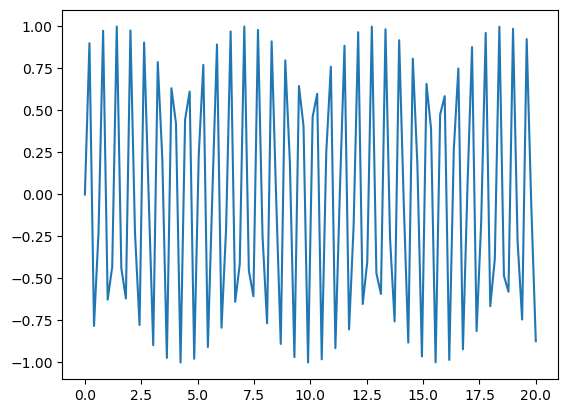

In [2]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0, 20, 100) # 100 points between 0 and 20 seconds
f_0 = 10 # Frequency of the wave
X = np.sin(f_0 * time)
plt.plot(time, X)

This is our original plot of our sine function that we will add noise to, then we will apply the discrete fourier transformation to it.

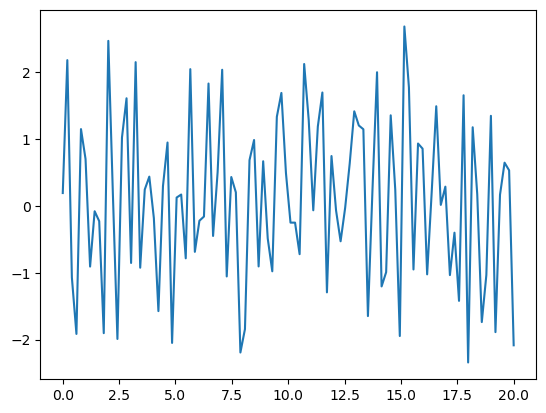

In [3]:
noise = np.random.randn(len(X)) # This uses Gaussian Distribution! Cool! 
# Basically the + noise makes the mid line (?) of the function increase or decrease, which is how it adds noise.
X = X + noise
plt.plot(time, X)

Now to apply the discrete fourier transformation to the function above.

The Discrete Fourier Transformation

Plain Explaination:
    'It takes your signal and figures out "how much of each frequency" is inside it.'

Formula works on signals made of N samples (N numbers)

$$ X\left(f\right) = \Sigma \space  x\left(n\right) \times e^{-2\pi i \times f \times \frac{n}{N}}$$

x(n) is the original signal at time-step n.

N = # of total samples

f = which 'frequency bin' I'm analysing. 

n = which sample part i'm working on.

X(f) is how much frequency is present in my signal.

Frequency bin:
    a key part to this is choosing the Frequency sampling rate. It should be at least 2 * the max frequency you want to perserve.
    
    In simple terms, sampling rate means "How often do I measure or record the signal per second?"
    
The frequency sample is described as this: $ f_s = \frac{number\space of\space samples}{time} $

Now, to create a frequency bin:
    Frequency at Bin $ k = \frac{index}{N} \times f_s $

/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


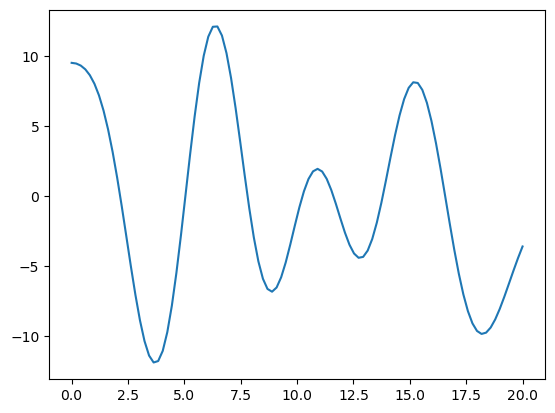

In [ ]:


def frequencyBin(X):
    N = len(X)
    t = 20
    #t = time[len(time) - 1] - time[0]
    f_s = N / t
    k = []
    for i in range(N):
        add = i / N * f_s
        k.append(add)
    return np.array(k)



def dft(X):
    N = len(X)
    k = frequencyBin(X)
    out = []
    
    for i in range(N):
        X_f = 0

        for n in range(N):
            e = np.exp(2j * np.pi * k[i] * n/N)
            X_f += X[n] * e

        out.append(X_f)
    return np.array(out)
Y = dft(X)
plt.plot(time, Y)

In [ ]:
# Look into fast fourier transform